<div style="text-align:center">
    <h1 style="font-size:60px"><b>Recommendation System</b></h1>
</div>

<div>
  <img src="../img/IMDb_Header_Page.jpg" width="1200" height="800" style="align-self:center; display: block;">
</div>

In [1]:
import matplotlib.pylab as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import re
import missingno as msno
import json

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200
# pd.options.display.max_colwidth = None

<div style="text-align:center">
    <h1 style="font-size:40px"><b>Reading Data</b></h1>
</div>

In [2]:
df = pd.read_csv('../data/movies_6000.csv')

<div style="text-align:center">
    <h1 style="font-size:40px"><b>Data Preparation</b></h1>
</div>

In [5]:
# Função lambda para contar elementos da lista
count_elements = lambda x: len(x)

# Aplicando a função lambda para criar nova coluna
df['count_directors'] = df['directed_by'].apply(count_elements)

In [6]:
# definindo a função para extrair os valores numéricos
def extrair_valor_numerico(texto):
    if isinstance(texto, str):
        return re.findall('\d+', texto)[0]
    else:
        return np.nan

# aplicando a função à coluna 'duration'
df['duration'] = df['duration'].apply(extrair_valor_numerico)

In [7]:
# Função para contar o número de ocorrências da chave "name" em cada dicionário da lista
def count_names(json_str):
    # Analisa a string JSON em um objeto Python
    dicts_list = json.loads(json_str)
    
    # Conta o número de ocorrências da chave "name"
    return sum(1 for d in dicts_list if 'name' in d)

# Aplica a função à coluna 'json_col' e cria uma nova coluna 'names_count'
df['names_count'] = df['cast'].apply(count_names)

In [22]:
# #Definindo a função para formatar os valores
# def formatar_votos(votos):
#     return float('{:,.0f}'.format(votos).replace(',', '.'))

# # Aplicando a função à coluna 'votes'
# df['votes'] = df['votes'].apply(formatar_votos)

In [9]:
df['reviews'] = df['reviews'].apply(lambda x: np.nan if x == '[]' else x)
df['genres'] = df['genres'].apply(lambda x: np.nan if x == '[]' else x)

In [41]:
df['duration'] = df['duration'].astype('int64')

<div style="text-align:center">
    <h1 style="font-size:40px"><b>Data Understanding</b></h1>
</div>

In [18]:
df.head()

,_id,cast,certificates,directed_by,duration,genres,rating,reviews,title,votes,year,count_directors,names_count
0,644537204bc8fe3e2fd007a6,"[{""name"":""Kevin Michael Richardson"",""character...",10,"[""Aaron Horvath"",""Michael Jelenic"",""Pierre Led...",92,"[""Animation"",""Adventure"",""Comedy""]",7.4,"[""Granted, this film is not going to appeal to...",Super Mario Bros. - O Filme,67771.0,2023,125,37
1,644537224bc8fe3e2fd007aa,"[{""name"":""Keanu Reeves"",""character"":""John Wick...",16,"[""Chad Stahelski"",""Keanu Reeves"",""Laurence Fis...",169,"[""Action"",""Crime"",""Thriller""]",8.2,"[""Half of this review will be me gushing about...",John Wick 4: Baba Yaga,124865.0,2023,88,32
2,644537254bc8fe3e2fd007ac,"[{""name"":""Chris Pine"",""character"":""Edgin""},{""n...",12,"[""John Francis Daley"",""Jonathan Goldstein"",""Ch...",134,"[""Action"",""Adventure"",""Comedy""]",7.6,"[""A surprisingly strong blockbuster - surpassi...",Dungeons & Dragons: Honra Entre Rebeldes,48403.0,2023,110,76
3,644537274bc8fe3e2fd007b0,"[{""name"":""Ariana Greenblatt"",""character"":""Sash...",NaN,"[""Greta Gerwig"",""Ariana Greenblatt"",""Margot Ro...",NaN,"[""Adventure"",""Comedy"",""Fantasy""]",NaN,NaN,Barbie,NaN,2023,82,57
4,6445372a4bc8fe3e2fd007b4,"[{""name"":""Matt Damon"",""character"":""Sonny Vacca...",12,"[""Ben Affleck"",""Matt Damon"",""Jason Bateman"",""B...",111,"[""Drama"",""Sport""]",7.7,"[""Really, really loved this movie. I know it's...",Air: A História Por Trás do Logo,19877.0,2023,74,37


In [11]:
df.shape

(6610, 13)

In [19]:
df.columns

Index(['_id', 'cast', 'certificates', 'directed_by', 'duration', 'genres',
       'rating', 'reviews', 'title', 'votes', 'year', 'count_directors',
       'names_count'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6610 entries, 0 to 6609
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              6610 non-null   object 
 1   cast             6610 non-null   object 
 2   certificates     2832 non-null   object 
 3   directed_by      6610 non-null   object 
 4   duration         6610 non-null   int64  
 5   genres           6600 non-null   object 
 6   rating           6221 non-null   float64
 7   reviews          5713 non-null   object 
 8   title            6610 non-null   object 
 9   votes            6221 non-null   float64
 10  year             6610 non-null   int64  
 11  count_directors  6610 non-null   int64  
 12  names_count      6610 non-null   int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 671.5+ KB


In [14]:
# selecionando as colunas numéricas e categóricas
colunas_numericas = df.select_dtypes(include=['int', 'float']).columns
colunas_categoricas = df.select_dtypes(include=['object']).columns

print("Colunas numéricas:", colunas_numericas)
print("\n")
print("Colunas categóricas:", colunas_categoricas)

Colunas numéricas: Index(['rating', 'year', 'count_directors', 'names_count'], dtype='object')


Colunas categóricas: Index(['_id', 'cast', 'certificates', 'directed_by', 'duration', 'genres',
       'reviews', 'title', 'votes'],
      dtype='object')


In [15]:
df.describe()

,rating,year,count_directors,names_count
count,6221.000000,6610.000000,6610.000000,6610.000000
mean,5.970053,2020.747050,84.448411,36.468533
std,1.285901,1.665519,14.333780,33.373361
min,1.100000,2018.000000,2.000000,0.000000
25%,5.200000,2019.000000,78.000000,16.000000
50%,6.100000,2021.000000,83.000000,28.000000
75%,6.800000,2022.000000,90.000000,46.000000
max,9.900000,2023.000000,417.000000,478.000000


In [23]:
# Verificando duplicados
df.loc[df.duplicated()]

,_id,cast,certificates,directed_by,duration,genres,rating,reviews,title,votes,year,count_directors,names_count


### Identificação de Missing Values

In [24]:
df.isna().sum()

_id                   0
cast                  0
certificates       3778
directed_by           0
duration            377
genres               10
rating              389
reviews             897
title                 0
votes               389
year                  0
count_directors       0
names_count           0
dtype: int64

In [25]:
# Calculando as porcentagens de valores ausentes em cada coluna
percent_missing = df.isna().sum() / df.shape[0] * 100

# Ordenando as porcentagens em ordem crescente
percent_missing_sorted = percent_missing.sort_values(ascending=False)

# Imprimindo as porcentagens ordenadas
print(percent_missing_sorted)

certificates       57.155825
reviews            13.570348
rating              5.885023
votes               5.885023
duration            5.703480
genres              0.151286
_id                 0.000000
cast                0.000000
directed_by         0.000000
title               0.000000
year                0.000000
count_directors     0.000000
names_count         0.000000
dtype: float64


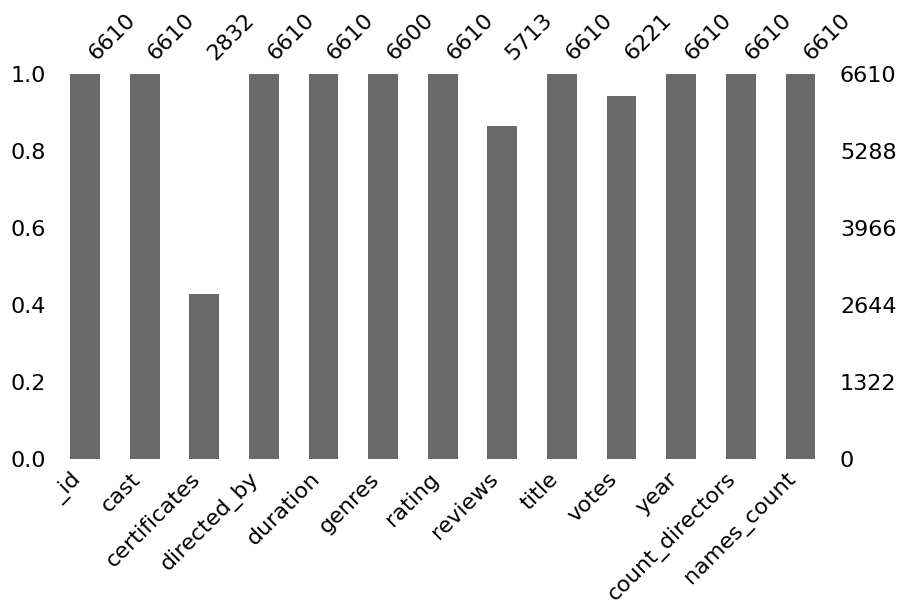

In [54]:
msno.bar(df, figsize=(10,5), p=True);

In [ ]:
#  contagem de valores únicos presentes na coluna 'title' 
df['title'].value_counts()

### Tratamento dos Missing Values

In [ ]:
df.drop('certificates', inplace=True) # Mais de 50% dos valores são Faltantes

In [ ]:
df['duration'] = df['duration'].fillna(0).astype(int)

In [ ]:
df['rating'] = df['rating'].fillna(0).astype(float)

<div style="text-align:center">
    <h1 style="font-size:40px"><b> Exploratory Data Analysis</b></h1>
</div>

# Sumary

* ### Quantidade de filme por ano
* ### Média de duração de cada filme
* ### O gênero mais predominante por ano
* ### Quais Filmes foram os mais votados
* ### Média de Filmes por ano
* ### Os filmes que duram mais, tem mais elenco? 
* ### Os filmes que duram mais, têm mais votos ou rating maior? 

In [ ]:
# Conta a quantidade de filmes por ano
df['year'].value_counts()

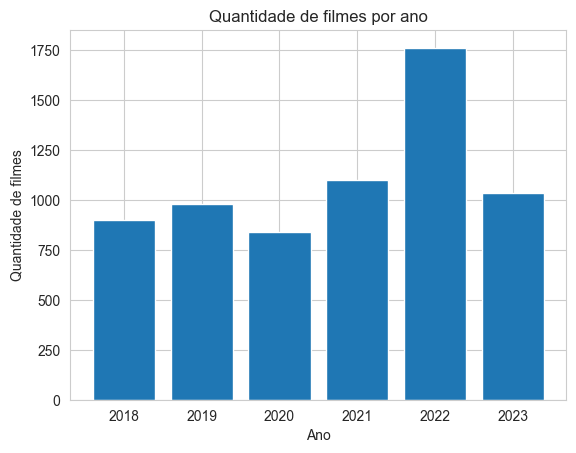

In [80]:
# Conta a quantidade de filmes por ano e ordena por ano
counts = df['year'].value_counts().sort_index()

# Cria o gráfico de barras
plt.bar(counts.index, counts.values)

# Adiciona um título e nomeia os eixos
plt.title('Quantidade de filmes por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de filmes')

# Exibe o gráfico
plt.show()

In [89]:
#Os Filmes mais votados

# Ordena o DataFrame pelos votos em ordem decrescente
sorted_df = df.sort_values('votes', ascending=False)

# Seleciona as colunas "title" e "votes" dos 10 primeiros filmes
top_movies = sorted_df[['title', 'votes']].head(10)
top_movies

,title,votes
130,Coringa,1340524.0
124,Vingadores: Ultimato,1168846.0
199,Vingadores: Guerra Infinita,1113229.0
121,Parasita,844200.0
220,Pantera Negra,797608.0
112,Homem-Aranha: Sem Volta para Casa,787066.0
82,Era Uma Vez Em... Hollywood,771481.0
110,Entre Facas e Segredos,721926.0
61,Batman,692512.0
89,Duna,664587.0


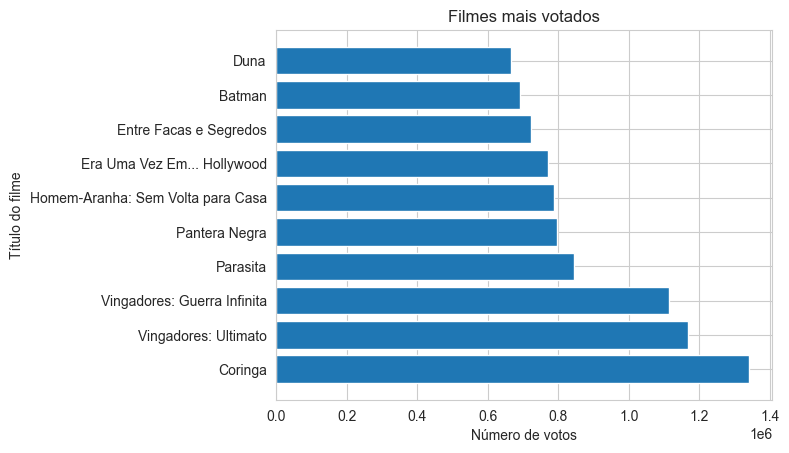

In [86]:
# Define os dados a serem plotados
titles = top_movies['title']
votes = top_movies['votes']

# Cria o gráfico de barras horizontais
plt.barh(titles, votes)

# Define o título do gráfico e dos eixos
plt.title('Filmes mais votados')
plt.xlabel('Número de votos')
plt.ylabel('Título do filme')

# Exibe o gráfico
plt.show()

In [92]:
# Classifica o dataframe por ano e votos
df_sorted = df.sort_values(['year', 'votes'], ascending=[True, False])

# Agrupa o dataframe por ano e seleciona os 5 filmes mais votados para cada ano
df_top5 = df_sorted.groupby('year').head(5)

# Exibe o resultado
print(df_top5[['year', 'title', 'votes']])

      year                                              title      votes
199   2018                        Vingadores: Guerra Infinita  1113229.0
220   2018                                      Pantera Negra   797608.0
246   2018                                         Deadpool 2   600442.0
136   2018                       Homem-Aranha: No Aranhaverso   555535.0
237   2018                                  Bohemian Rhapsody   552808.0
130   2019                                            Coringa  1340524.0
124   2019                               Vingadores: Ultimato  1168846.0
121   2019                                           Parasita   844200.0
82    2019                        Era Uma Vez Em... Hollywood   771481.0
110   2019                             Entre Facas e Segredos   721926.0
146   2020                                              Tenet   525630.0
451   2020                                               Soul   342406.0
327   2020                              Mulher-Mara

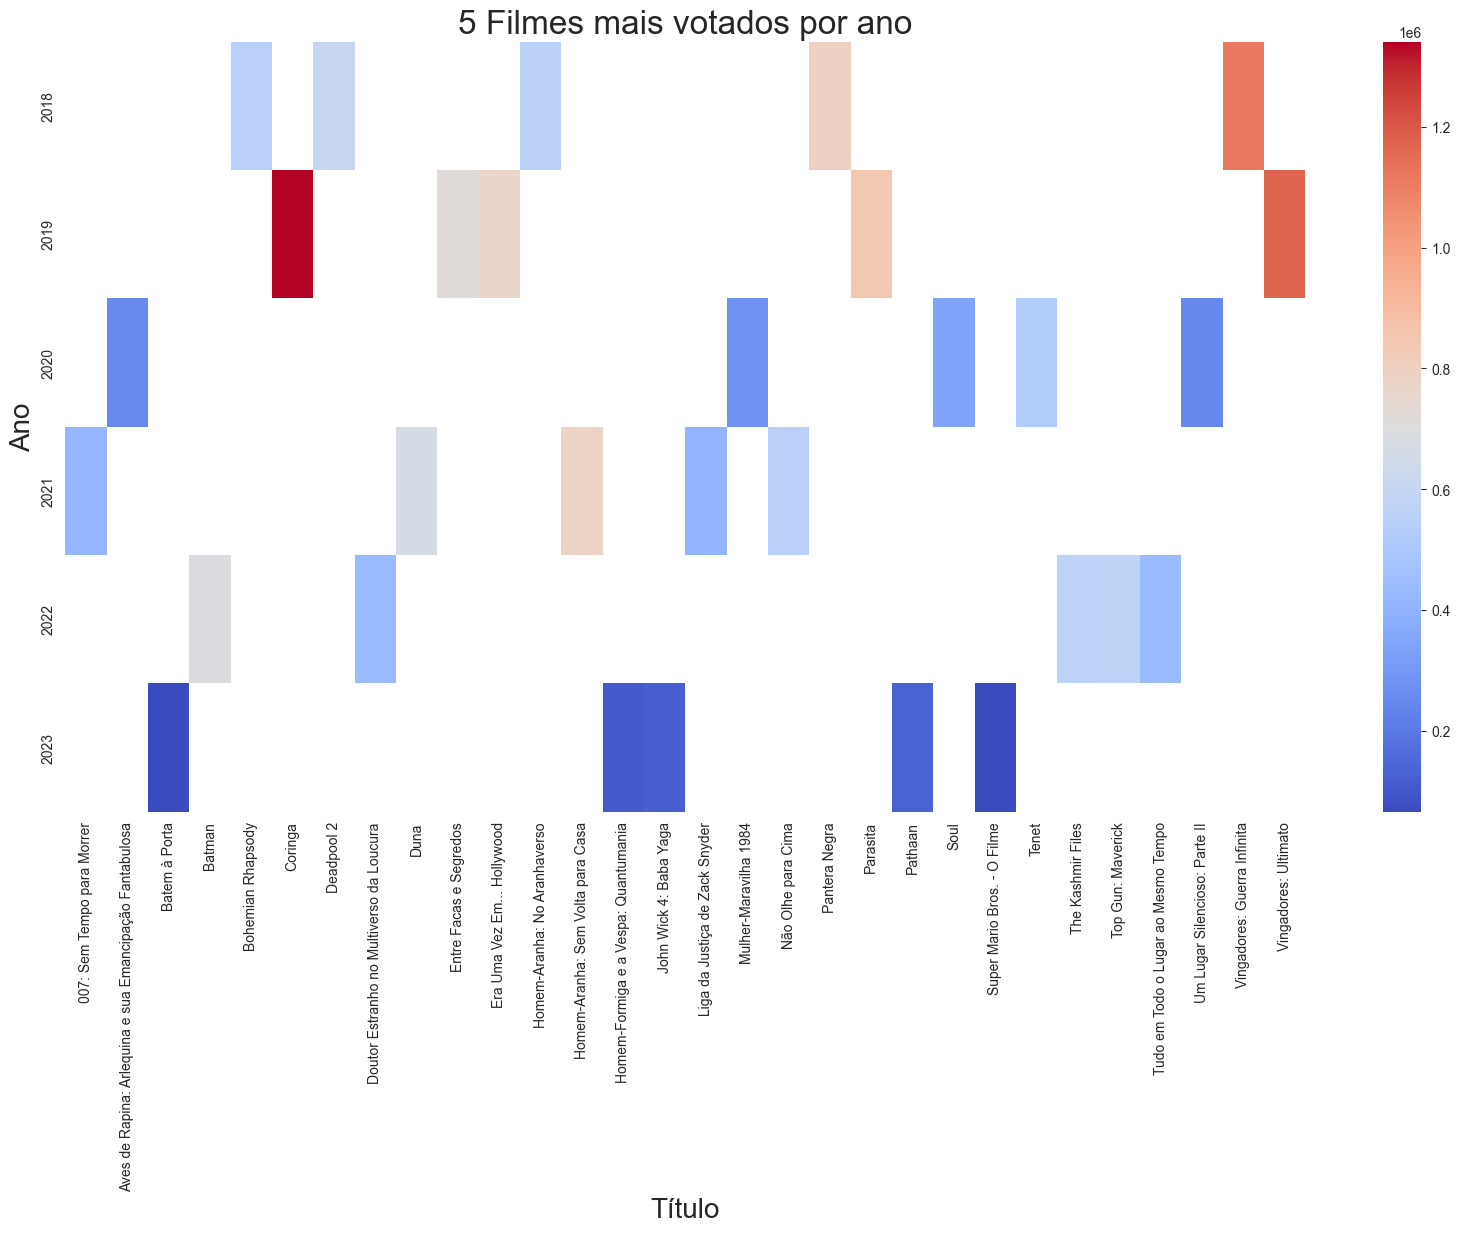

In [127]:
# Seleciona as 5 linhas mais votadas para cada ano
df_top5 = df.groupby('year').apply(lambda x: x.nlargest(5, 'votes')).reset_index(drop=True)

# Cria uma tabela pivô com os anos como índices e os títulos como colunas
pivot_table = pd.pivot_table(df_top5, values='votes', index='year', columns='title')

# Cria o heatmap com base na tabela pivô
plt.figure(figsize=(20,10))
sns.heatmap(pivot_table, cmap='coolwarm')

# Adiciona rótulos ao gráfico
plt.title('5 Filmes mais votados por ano', fontsize=24)
plt.xlabel('Título', fontsize=20)
plt.ylabel('Ano', fontsize=20)

# Exibe o gráfico
plt.show()

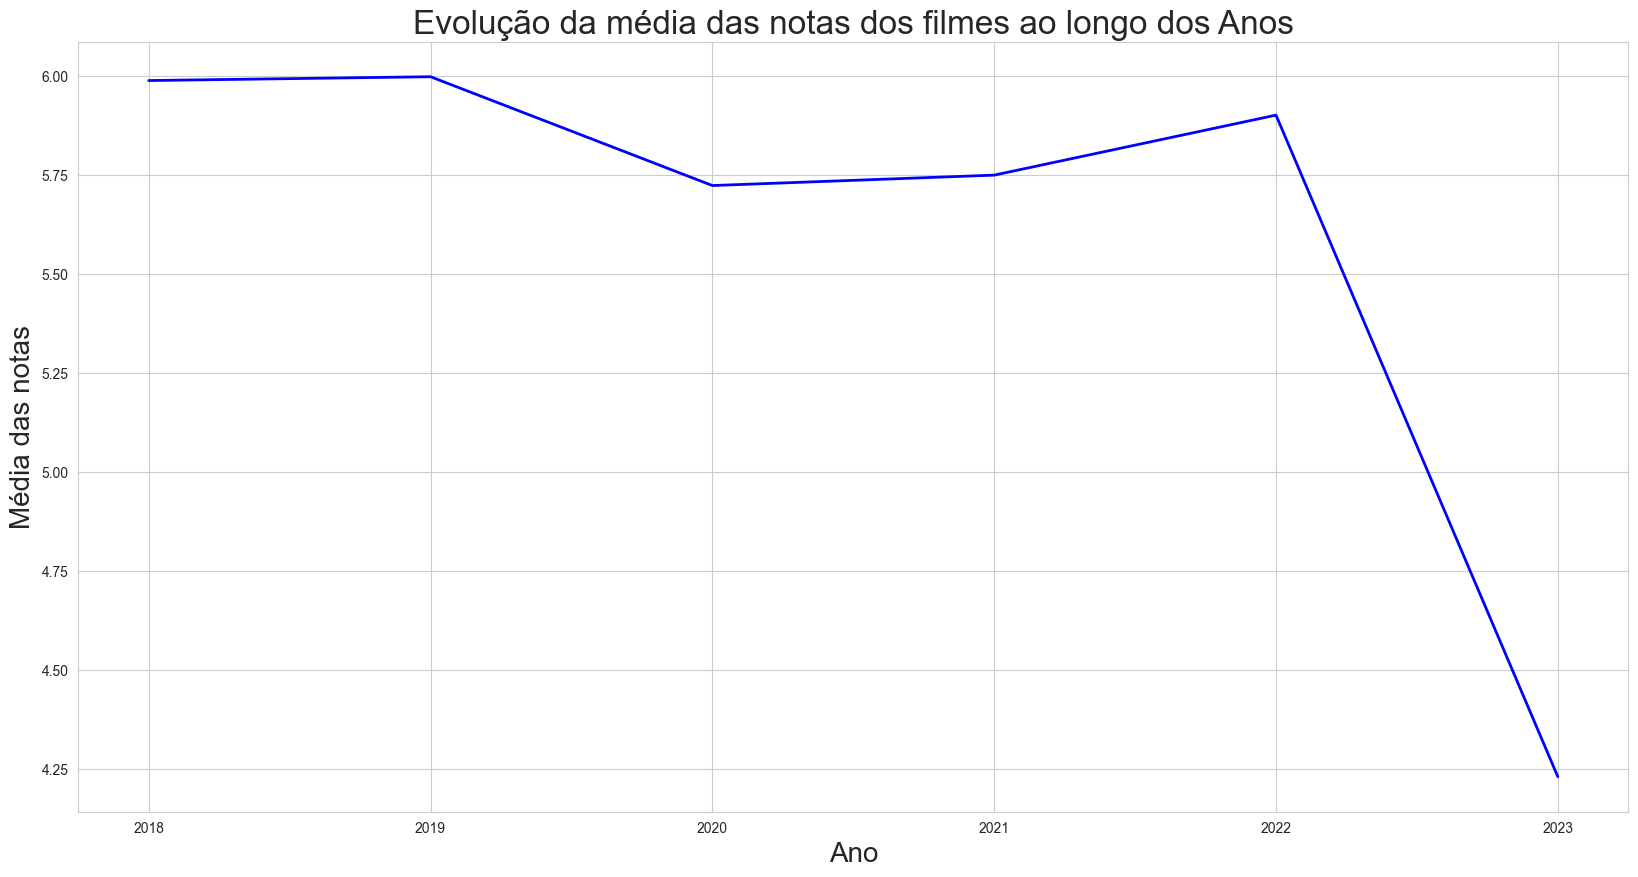

In [128]:
# Agrupa os filmes por ano e calcula a média das notas
df_mean = df.groupby('year')['rating'].mean()

# Plota um gráfico de linhas para mostrar a evolução da média das notas ao longo dos anos
plt.figure(figsize=(20,10))
sns.lineplot(x=df_mean.index, y=df_mean.values, color='blue', linewidth=2)

# Adiciona rótulos ao gráfico
plt.title('Evolução da média das notas dos filmes ao longo dos Anos', fontsize=24)
plt.xlabel('Ano', fontsize=20)
plt.ylabel('Média das notas', fontsize=20)

# Exibe o gráfico
plt.show()

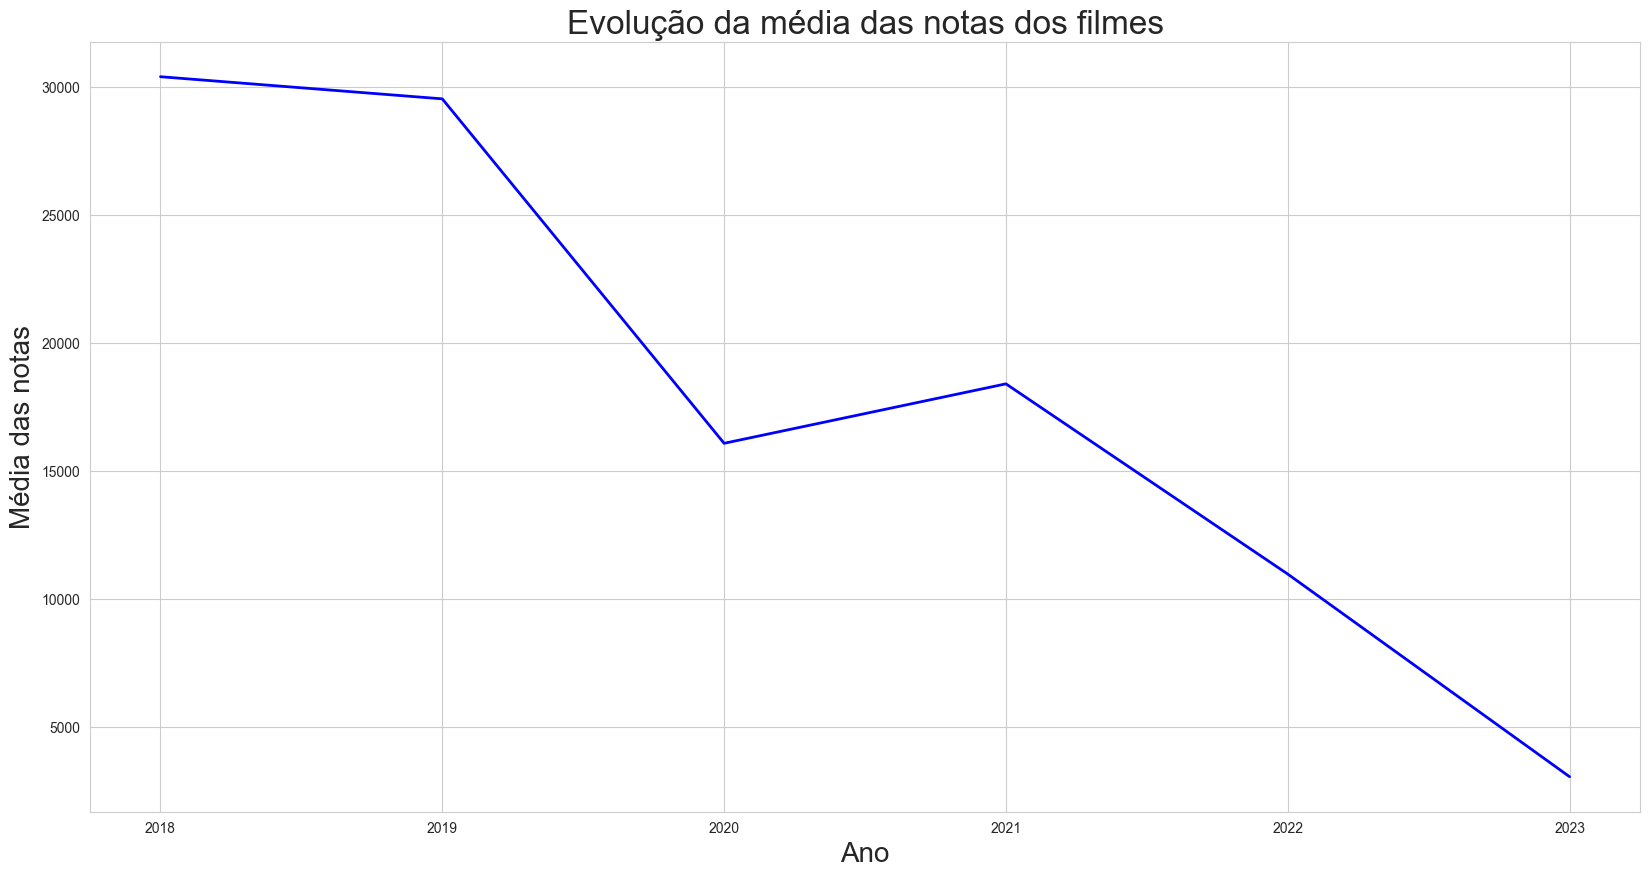

In [121]:
# Agrupa os filmes por ano e calcula a média das notas
df_mean = df.groupby('year')['votes'].mean()

# Plota um gráfico de linhas para mostrar a evolução da média das notas ao longo dos anos
plt.figure(figsize=(20,10))
sns.lineplot(x=df_mean.index, y=df_mean.values, color='blue', linewidth=2)

# Adiciona rótulos ao gráfico
plt.title('Evolução da média de votos dos filmes', fontsize=24)
plt.xlabel('Ano', fontsize=20)
plt.ylabel('Média das notas', fontsize=20)

# Exibe o gráfico
plt.show()

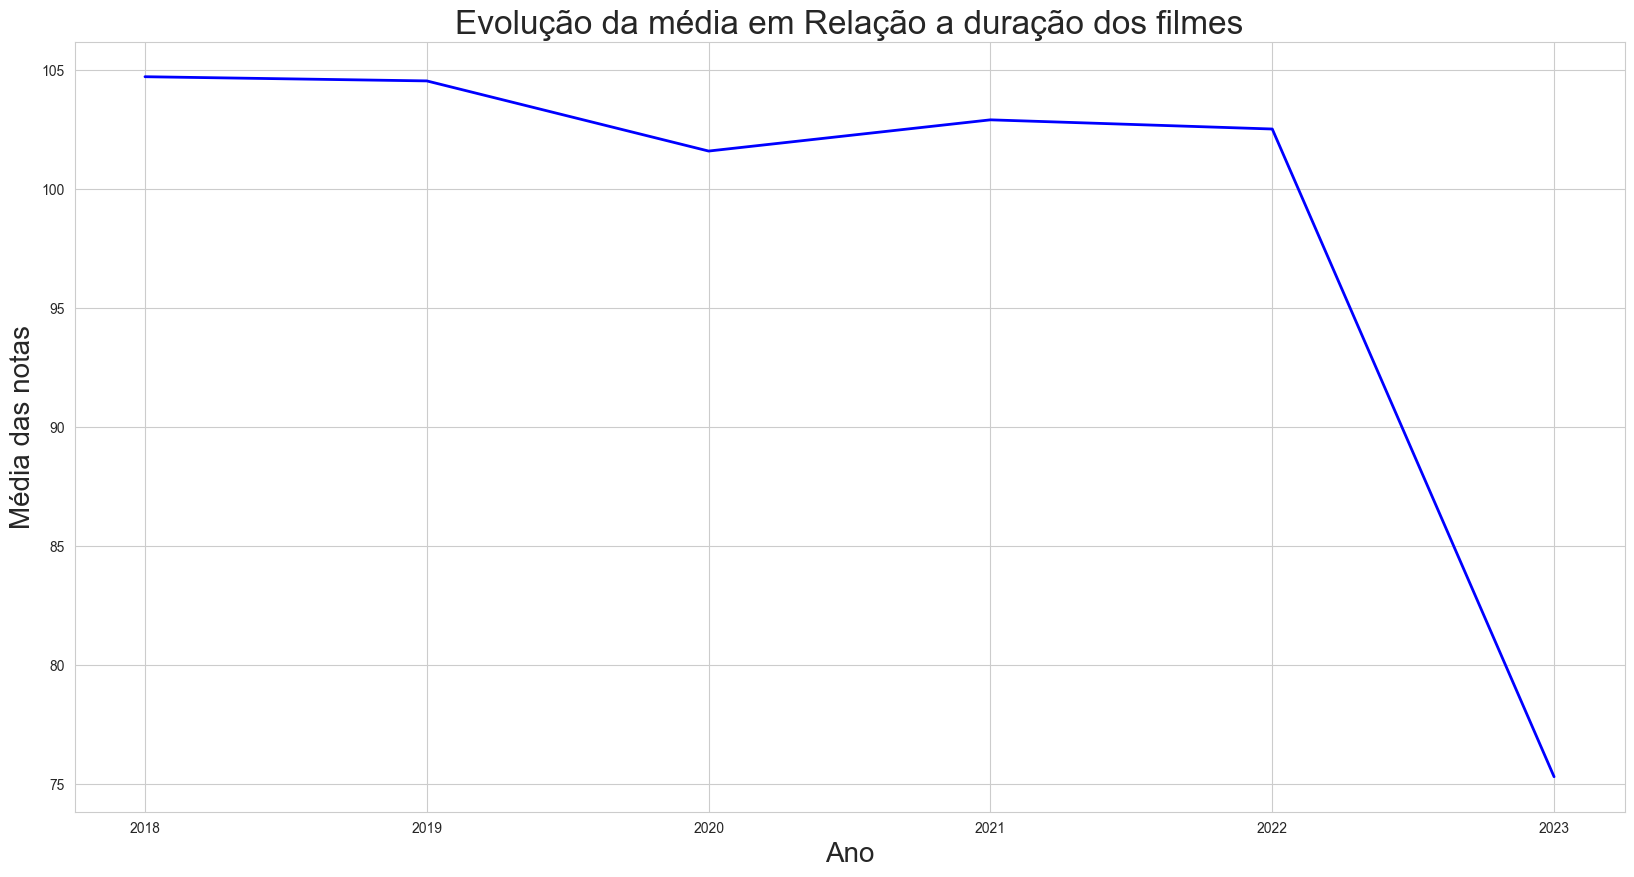

In [123]:
# Agrupa os filmes por ano e calcula a média das notas
df_mean = df.groupby('year')['duration'].mean()

# Plota um gráfico de linhas para mostrar a evolução da média das notas ao longo dos anos
plt.figure(figsize=(20,10))
sns.lineplot(x=df_mean.index, y=df_mean.values, color='blue', linewidth=2)

# Adiciona rótulos ao gráfico
plt.title('Evolução da média em Relação a duração dos filmes', fontsize=24)
plt.xlabel('Ano', fontsize=20)
plt.ylabel('Média das notas', fontsize=20)

# Exibe o gráfico
plt.show()

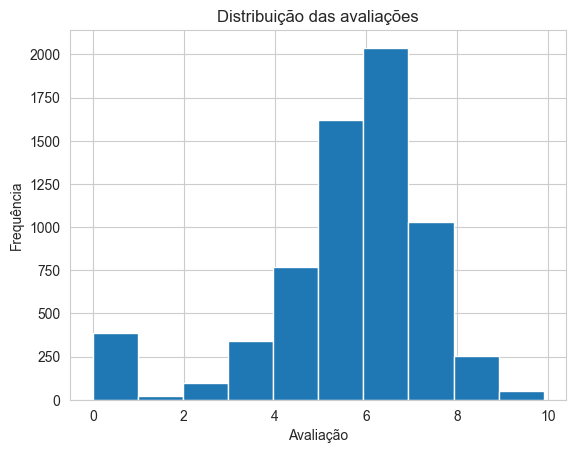

In [129]:
# Cria o histograma
plt.hist(df['rating'], bins=10)

# Define o título do gráfico e dos eixos
plt.title('Distribuição das avaliações')
plt.xlabel('Avaliação')
plt.ylabel('Frequência')

# Exibe o gráfico
plt.show()

C:\Users\t.vinuto\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


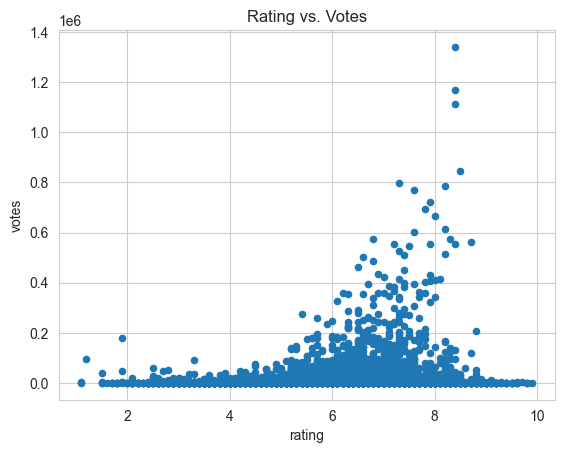

In [132]:
df.plot(kind='scatter',
        x='rating',
        y='votes',
        title='Rating vs. Votes')
plt.show();

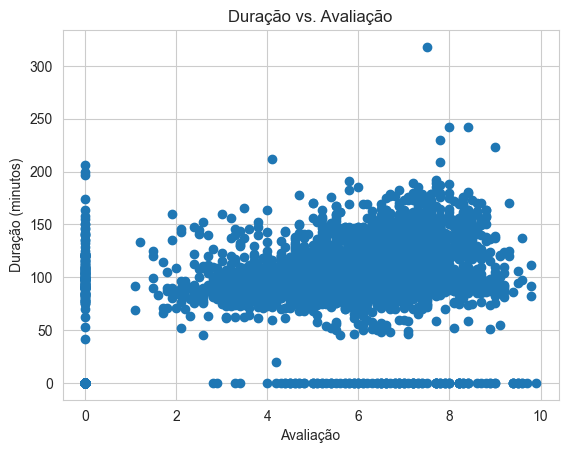

In [151]:
plt.scatter(x=df['rating'], y=df['duration'])
plt.xlabel('Avaliação')
plt.ylabel('Duração (minutos)')
plt.title('Duração vs. Avaliação')
plt.show()

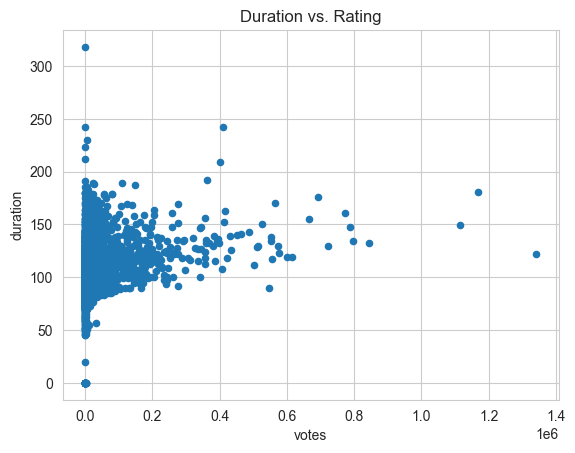

In [148]:
df.plot(kind='scatter',
        x='votes',
        y='duration',
        title='Duration vs. votes')
plt.show();

Text(0, 0.5, 'Número')

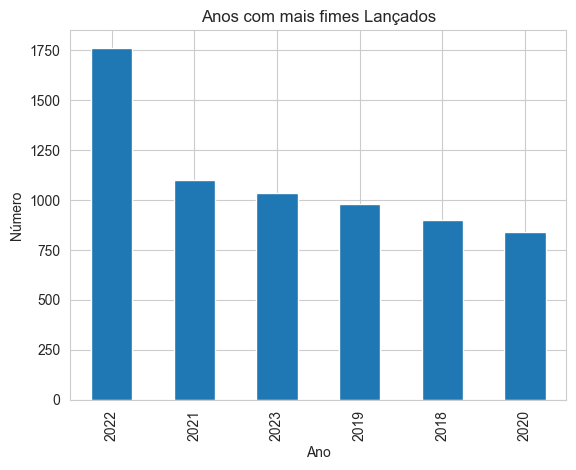

In [133]:
ax = df['year'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Anos com mais fimes Lançados')
ax.set_xlabel('Ano')
ax.set_ylabel('Número')

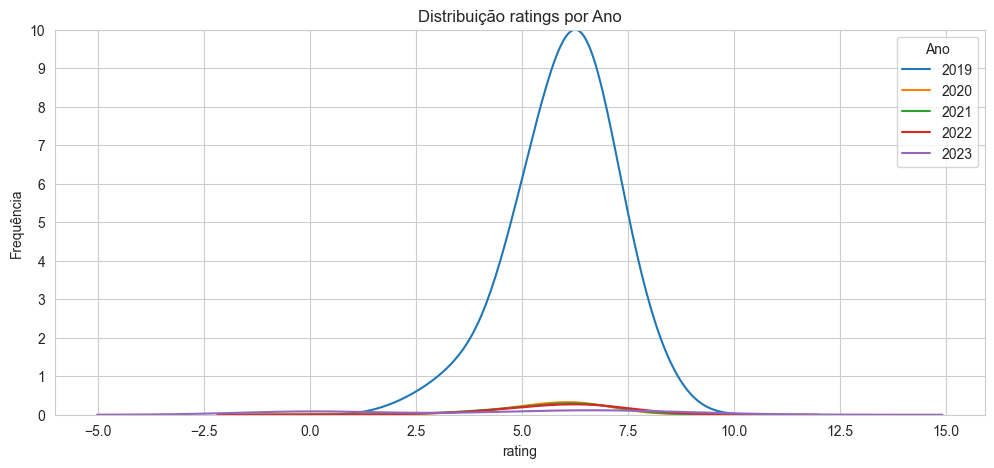

In [144]:
plt.figure(figsize=(12,5))
plt.title('Distribuição ratings por Ano')

for year in range(2019, 2024):
    subset = df[df['year'] == year]['rating']
    hist, bin_edges = np.histogram(subset, bins=50, density=True)
    kde = sns.kdeplot(subset, bw_method=0.5, label=str(year))
    kde.set_yticks(range(0, 11))
    kde.set_ylim(bottom=0, top=10)
    kde_lines = kde.lines[0]
    kde_density = kde_lines.get_ydata()
    scaled_density = kde_density / kde_density.max() * 10
    kde_lines.set_ydata(scaled_density)
    kde.set_yticklabels([str(i) for i in range(0, 11)])
    
plt.legend(title='Ano')

# Altera o rótulo do eixo Y
plt.ylabel('Frequência')

plt.show()

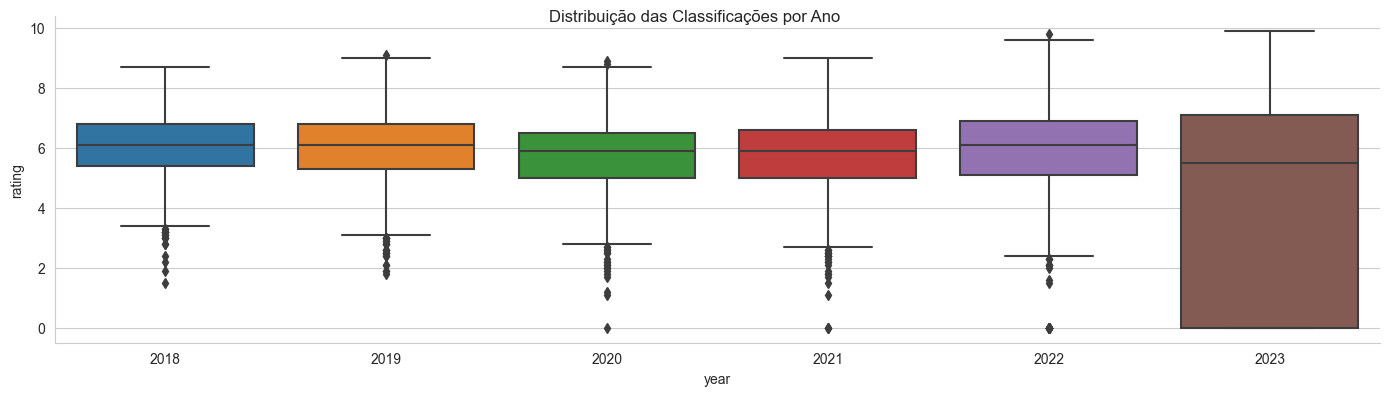

In [141]:
ax = sns.catplot(x='year', y='rating', data=df, kind="box", height=4, aspect=3.5)
ax.fig.suptitle('Distribuição das Classificações por Ano')
plt.show()

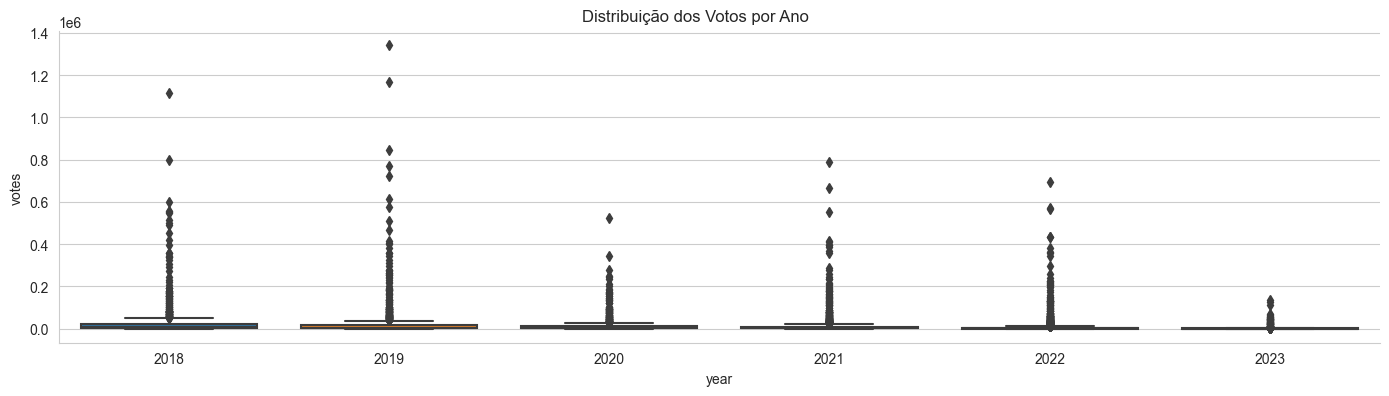

In [142]:
ax = sns.catplot(x='year', y='votes', data=df, kind="box", height=4, aspect=3.5)
ax.fig.suptitle('Distribuição dos Votos por Ano')
plt.show()

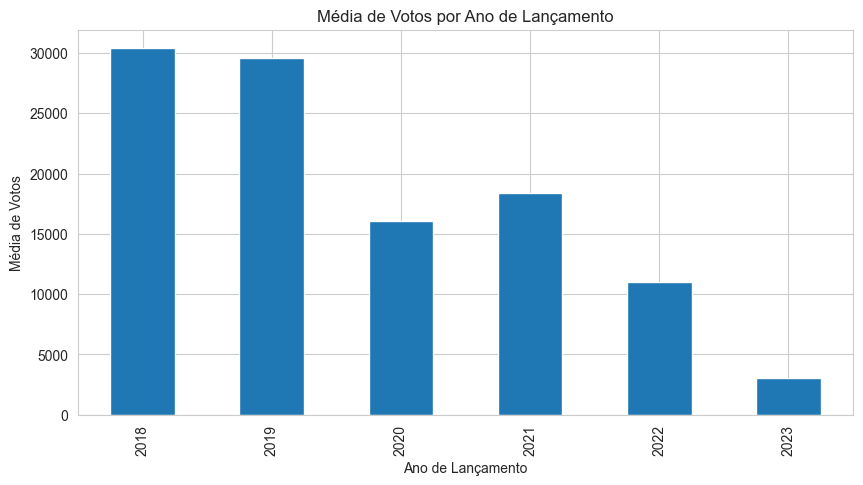

In [150]:
yearly_votes = df.groupby('year')['votes'].mean()
yearly_votes.plot(kind='bar', figsize=(10,5))
plt.xlabel('Ano de Lançamento')
plt.ylabel('Média de Votos')
plt.title('Média de Votos por Ano de Lançamento')
plt.show()

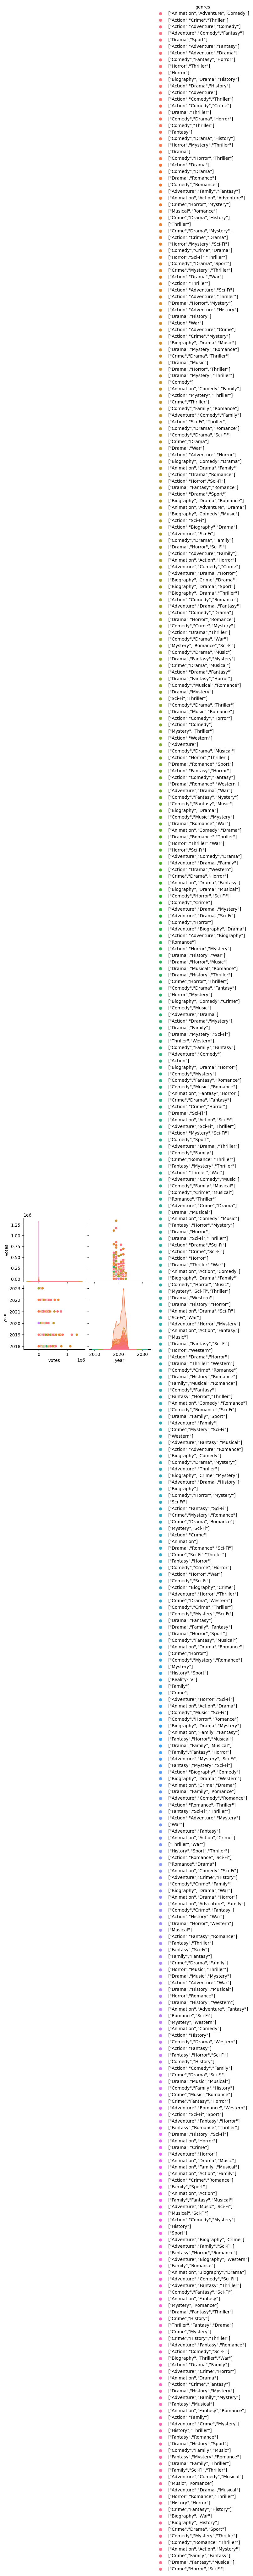

In [48]:
# Generos mais votados por ano
sns.pairplot(df,
             vars=['votes', 'year'],
            hue='genres')
plt.show()

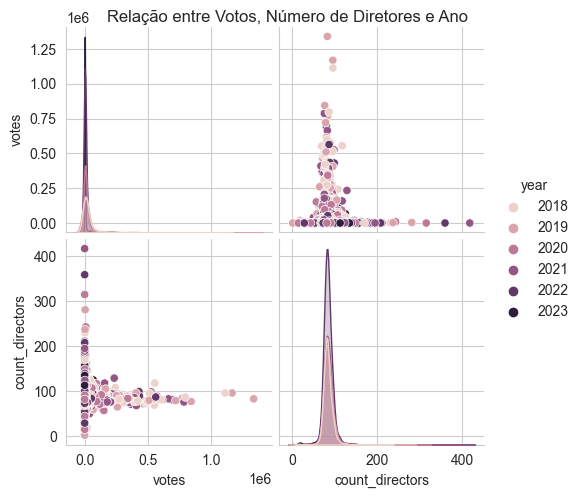

In [153]:
sns.pairplot(df,
             vars=['votes', 'count_directors'],
             hue='year')

plt.suptitle('Relação entre Votos, Número de Diretores e Ano', fontsize=12)
plt.subplots_adjust(top=0.95)
plt.show()

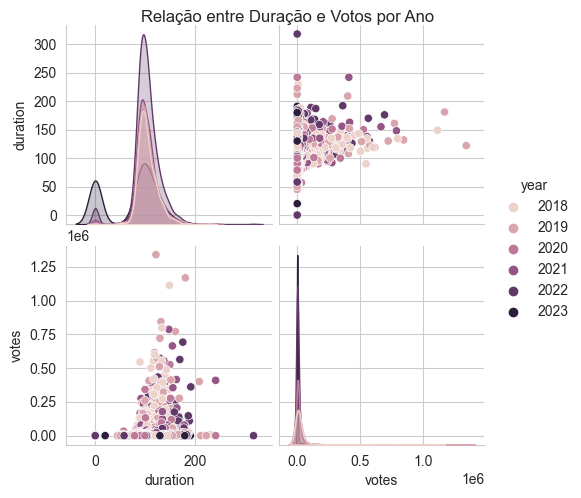

In [155]:
sns.pairplot(df,
             vars=['duration', 'votes'],
             hue='year')

plt.suptitle('Relação entre Duração e Votos por Ano', fontsize=12)

plt.subplots_adjust(top=0.95)
plt.show()

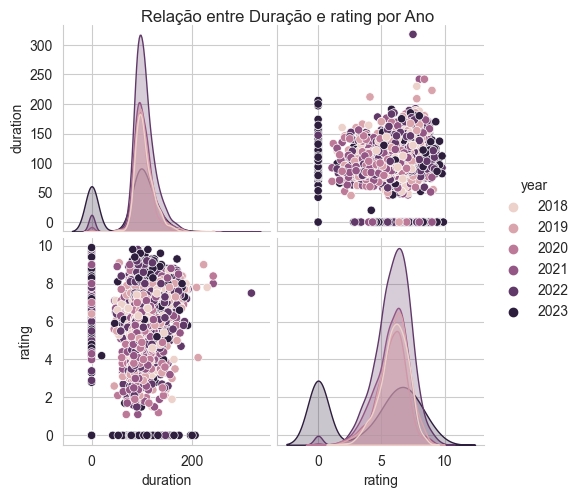

In [156]:
sns.pairplot(df,
             vars=['duration', 'rating'],
            hue='year')

plt.suptitle('Relação entre Duração e rating por Ano', fontsize=12)

plt.subplots_adjust(top=0.95)
plt.show()